In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import random
from keras import layers, models, optimizers


In [2]:
df=pd.read_csv('train_labels.csv')

In [3]:
df.head()

,id,label
0,10,cat
1,18,cat
2,22,cat
3,27,cat
4,34,cat


In [4]:
len(df)

8000

In [5]:
img = cv2.imread('10.png')
dimensions = img.shape()

AttributeError: 'NoneType' object has no attribute 'shape'

In [10]:
img_dir="C:\\Users\\Dell\\OneDrive\\Desktop\\ml\\PreRequists\\Task_3\\train_data"
ids = df["id"].tolist()
labels = df["label"].tolist()

In [11]:
imgs = []

for img in ids:
    imgs.append(cv2.imread(os.path.join(img_dir,f"{img}.png")))

In [12]:
len(imgs)

8000

In [13]:
imgs[0]

array([[[116, 125, 125],
        [ 91, 101, 110],
        [ 83,  90, 102],
        ...,
        [214, 207, 202],
        [212, 205, 200],
        [214, 208, 202]],

       [[142, 146, 142],
        [139, 144, 146],
        [170, 172, 176],
        ...,
        [205, 201, 195],
        [209, 205, 198],
        [215, 211, 204]],

       [[183, 185, 180],
        [146, 146, 143],
        [157, 157, 156],
        ...,
        [113, 111, 122],
        [131, 128, 139],
        [150, 147, 158]],

       ...,

       [[ 41,  82, 104],
        [ 39,  80, 101],
        [ 38,  81, 101],
        ...,
        [ 67, 103, 126],
        [ 69, 103, 126],
        [ 68, 101, 125]],

       [[ 40,  81, 104],
        [ 41,  84, 105],
        [ 43,  88, 109],
        ...,
        [ 78, 113, 138],
        [ 80, 113, 137],
        [ 81, 112, 137]],

       [[ 42,  83, 105],
        [ 45,  87, 108],
        [ 50,  94, 115],
        ...,
        [ 82, 117, 143],
        [ 84, 116, 143],
        [ 86, 116, 144]]

In [14]:
clf = ["cat","dog"]
target = []
for label in labels :
    if label == "cat":
        target.append(clf.index(label))
    elif label == "dog":
        target.append(clf.index(label))

In [15]:
img_width=64
img_height = 64

In [16]:
def prepare_data(images,target):
    inp= []

    for i in range(len(target)):
        images[i]=cv2.resize(images[i], (img_width,img_height), interpolation=cv2.INTER_CUBIC)
        inp.append([images[i], target[i]])

    random.shuffle(inp) 
    x = []  
    y = []  

    for feature, tar in inp:
        x.append(feature)
        y.append(tar)
    
    x= np.array(x)
    x = x/255
    y= np.array(y)
    
    return x,y

In [17]:
x, y = prepare_data(imgs,target)

In [18]:
x[0]

array([[[0.87843137, 0.89803922, 0.89411765],
        [0.89803922, 0.91764706, 0.91372549],
        [0.92941176, 0.94901961, 0.94509804],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.78431373, 0.80392157, 0.8       ],
        [0.80392157, 0.82352941, 0.81960784],
        [0.83529412, 0.85490196, 0.85098039],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.63137255, 0.65098039, 0.64705882],
        [0.65098039, 0.6745098 , 0.66666667],
        [0.68627451, 0.70588235, 0.70196078],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.50980392, 0.49803922, 0.50980392],
        [0.56862745, 0.56470588, 0.58039216],
        [0.66666667, 0

In [19]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [22]:
history=model.fit(x,y, epochs = 10, validation_split = 0.2, batch_size = 32)

Epoch 1/10
200/200 [==============================] - 47s 151ms/step - loss: 0.6939 - accuracy: 0.4986 - val_loss: 0.6931 - val_accuracy: 0.5006
Epoch 2/10
200/200 [==============================] - 30s 151ms/step - loss: 0.6736 - accuracy: 0.5748 - val_loss: 0.6518 - val_accuracy: 0.6356
Epoch 3/10
200/200 [==============================] - 28s 139ms/step - loss: 0.6386 - accuracy: 0.6309 - val_loss: 0.6121 - val_accuracy: 0.6694
Epoch 4/10
200/200 [==============================] - 28s 141ms/step - loss: 0.6133 - accuracy: 0.6659 - val_loss: 0.5940 - val_accuracy: 0.6963
Epoch 5/10
200/200 [==============================] - 30s 149ms/step - loss: 0.5772 - accuracy: 0.7005 - val_loss: 0.5869 - val_accuracy: 0.6875
Epoch 6/10
200/200 [==============================] - 28s 142ms/step - loss: 0.5530 - accuracy: 0.7205 - val_loss: 0.5640 - val_accuracy: 0.7144
Epoch 7/10
200/200 [==============================] - 27s 134ms/step - loss: 0.5255 - accuracy: 0.7336 - val_loss: 0.5532 - val_ac

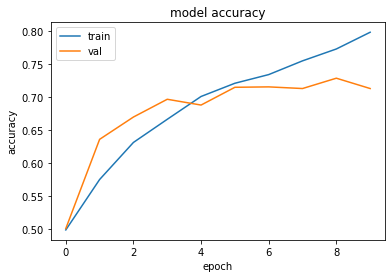

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
model.save("my_h5_model.h5")